In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [164]:
samples = 300

In [165]:
n = 5000
x0 = 1.
a = .1
dt = 0.1
sig = .75

In [166]:
white_noise = np.random.normal(loc=0, scale=np.sqrt(dt), size = (n, samples))/dt

In [167]:
x = np.zeros((n, samples))

In [181]:
x[0,:] = x0
for i in range(n-1):
    x[i+1:,] = (a+sig*white_noise[i, :])*x[i,:]*dt -0*sig*x0 * white_noise[ i, :] * dt + x[i,:]

Consider the stochastic differential equation:
$$\dot{x} = ax+\sigma x\frac{\partial W}{\partial t},$$
where $W$ is the Wiener process (brownian motion). The expected value of any solution satisifes the differential equation 
$\dot{x} = ax,$
and takes the form $x=Ke^{at}$ for some constant $K$. In particular, it converges to zero for $a<0$, diverges for $a>0$ and remains constant for $a=0$.

Interestingly, adding the noise stabilizes the equilibrium point (of zero). Infact, the solution to the stochastic DE takes the form:
$$x = Ke^{(a-\sigma^2/2)t+\sigma W},$$
so that the threshold for stability is at $a=\sigma^2/2$ rather than $a=0$.

In [182]:
prob_rate = a-(sig**2)/2
prob_rate

-0.18125

In [183]:
y = x0 * np.exp(prob_rate*np.arange(0, n*dt, dt))
z = x0 * np.exp(a*np.arange(0, n*dt, dt))

<function matplotlib.pyplot.show(*args, **kw)>

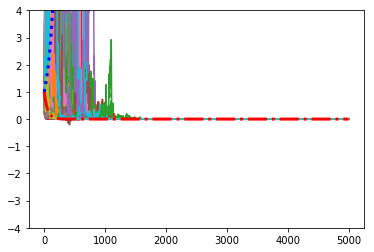

In [184]:
ylim = max( np.max(2*y),1)
for j in range(samples):
    plt.plot(x[:,j])
plt.plot(y, linewidth=3, color = "red", linestyle="-.")
plt.plot(z, linewidth=3, color = "blue", linestyle=":")
plt.ylim((-2*ylim, 2*ylim))
plt.show

In [172]:
np.cumsum(np.ones((2,5)), axis = 0)

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.]])

In [173]:
br = np.cumsum(dt*white_noise[:,:], axis = 0)
w = x0 * np.exp(prob_rate * np.stack([np.arange(0, n*dt, dt)]* samples, axis=1) + br)

<function matplotlib.pyplot.show(*args, **kw)>

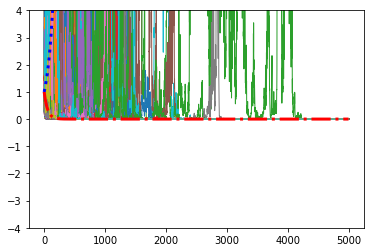

In [174]:
plt.plot(w, linewidth=1)
plt.plot(y, linewidth=3, color = "red", linestyle="-.")
plt.plot(z, linewidth=3, color = "blue", linestyle=":")
plt.ylim((-2*ylim, 2*ylim))
plt.show

In [175]:
sum(w[-1,:]>1)/samples

0.0

In [176]:
sum(x[-1,:]>5)/samples

0.21

(array([286.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ]),
 <a list of 50 Patch objects>)

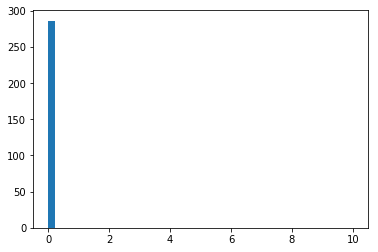

In [185]:
plt.hist(x[-1,:], bins=50, range=(0,10))